## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [1]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [2]:
data=fasion_mnist.data.values
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [3]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [4]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [5]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [6]:
[target.min(), target.max()]

[0, 9]

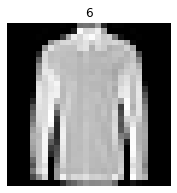

<Figure size 432x288 with 0 Axes>

In [7]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [8]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [9]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from  sklearn.decomposition import IncrementalPCA

n_components = 2
batch_size = 500
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Fit and transform the data using IncrementalPCA
X_ipca = ipca.fit_transform(data)



In [10]:
print(X_ipca)

[[ -126.06210131  1629.72714749]
 [ 1407.39385585  -452.14522821]
 [ -725.45517908 -1103.74529856]
 ...
 [ -510.54126459  -728.45869148]
 [ -220.84531804 -1413.1030654 ]
 [-1521.17353394    93.05690093]]


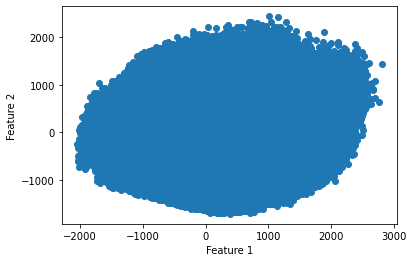

In [11]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()

fig, ax = plt.subplots()

# Plot the data points in 2D
ax.scatter(X_ipca[:,0], X_ipca[:,1])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Display the plot
plt.show()



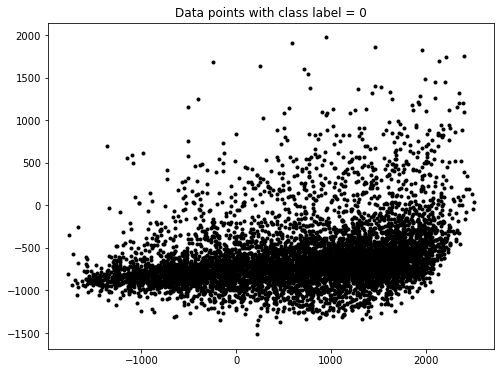

In [12]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D

mask = (target == 0)
data_0 = data[mask]

# Fit and transform the data with target label 0 using IncrementalPCA
X_ipca_0 = ipca.fit_transform(data_0)


# Filter X_ipca for target == 0
X_ipca_label_0 = X_ipca[target == 0]

# Visualize using ax.scatter
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_ipca_label_0[:, 0], X_ipca_label_0[:, 1], c='k', marker='.')
ax.set_title('Data points with class label = 0')
plt.show()

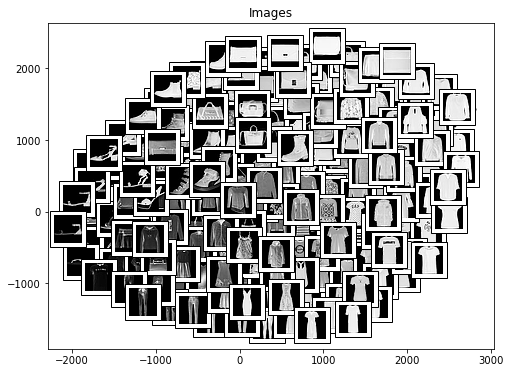

In [13]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model


# Visualize using plot_components
fig, ax = plt.subplots(figsize=(8, 6))
plot_components(X_ipca, model=ipca, images=images, ax=ax, cmap='gray')
ax.set_title('Images')
plt.show()

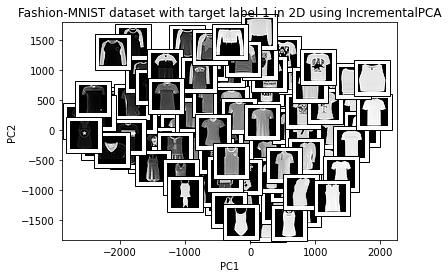

In [14]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]

mask = (target == 0)
data_1 = data[mask]
images_1 = images[mask]


# Fit and transform the data with target label 1 using IncrementalPCA
X_ipca_1 = ipca.fit_transform(data_1)

# Plot the components and data points with target label 1 using the IncrementalPCA model
fig, ax = plt.subplots()
plot_components(data_1, ipca, images_1, ax=ax, cmap='gray')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Fashion-MNIST dataset with target label 1 in 2D using IncrementalPCA')

# Display the plot
plt.show()

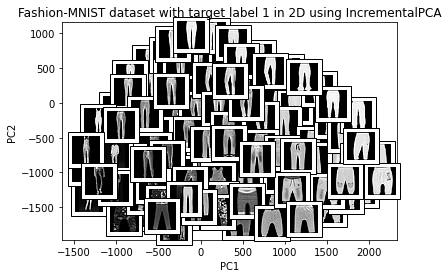

In [15]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]

mask = (target == 1)
data_1 = data[mask]
images_1 = images[mask]


# Fit and transform the data with target label 1 using IncrementalPCA
X_ipca_1 = ipca.fit_transform(data_1)

# Plot the components and data points with target label 1 using the IncrementalPCA model
fig, ax = plt.subplots()
plot_components(data_1, ipca, images_1, ax=ax, cmap='gray')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Fashion-MNIST dataset with target label 1 in 2D using IncrementalPCA')

# Display the plot
plt.show()

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [16]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
n_components = 100
batch_size = None
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size, copy=True, whiten=False)

# Print the IncrementalPCA object
print(ipca.get_params())



{'batch_size': None, 'copy': True, 'n_components': 100, 'whiten': False}


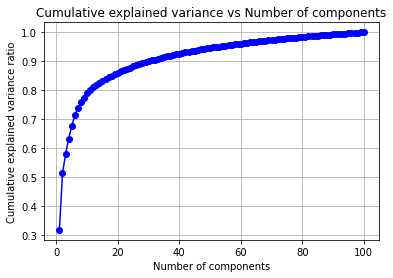

In [17]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid

# Use IncrementalPCA instead of PCA with n_components=100
n_components = 100
batch_size = None
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size, copy=True, whiten=False)

# Fit and transform the data using IncrementalPCA
X_ipca = ipca.fit_transform(data)

# Compute the explained variance of each principal component
variances = ipca.explained_variance_

# Compute the total variance
total_variance = np.sum(variances)

# Compute the percentage of variance explained by each principal component
var_exp = variances / total_variance

# Compute the cumulative sum of explained variances
cum_var_exp = np.cumsum(var_exp)

# Plot the curve of 'percentage of variance explained' vs n_components
fig, ax = plt.subplots()
ax.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'bo-')
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance ratio')
ax.set_title('Cumulative explained variance vs Number of components')
plt.grid()
plt.show()

In [18]:
# find the smallest value of n_component such that 
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same
# you do not need to re-fit the model using this new value of n_component

target_error = 0.20
target_variance = 0.80

# Compute the explained variance of each principal component
variances = ipca.explained_variance_

# Compute the total variance
total_variance = np.sum(variances)

# Compute the percentage of variance explained by each principal component
var_exp = variances / total_variance

# Compute the cumulative sum of explained variances
cum_var_exp = np.cumsum(var_exp)

# Find the smallest value of n_components that satisfies the conditions
n_components = np.argmax((cum_var_exp >= target_variance) & (var_exp >= target_variance)) + 1

# Print the smallest value of n_components
print('The smallest value of n_components is', n_components)

The smallest value of n_components is 1


In [19]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)

# Get the mean from the PCA model
mu = ipca.mean_

# Get the eigenvalues from the PCA model
v = ipca.explained_variance_

# Get the eigenvectors from the PCA model
w = ipca.components_

In [20]:
v.shape

(100,)

In [21]:
w.shape

(100, 784)

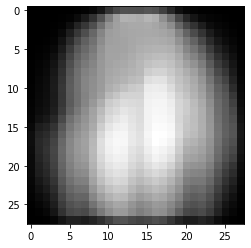

In [22]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

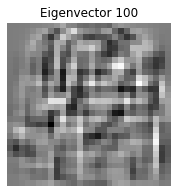

<Figure size 432x288 with 0 Axes>

In [23]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')    
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2) 

# Show the images of the eigenvectors
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, w.shape[0]):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title('Eigenvector {}'.format(n+1))
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)

In [24]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000002

In [25]:
# generate a random number
3*np.random.randn()

0.881504274918097

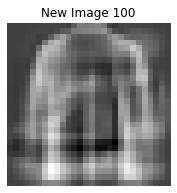

<Figure size 432x288 with 0 Axes>

In [26]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

# Set the number of new images to generate
n_new_images = 100

# Generate and show the new images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(n_new_images):
    # Generate random coefficients
    y = 3 * np.random.randn(n_components)
    
    # Compute the new image
    x_new = mu + np.dot(y * np.sqrt(v), w)
    
    # Reshape the new image to a 2D array
    x_new = x_new.reshape(28, 28)
    
    # Show the new image
    ax.imshow(x_new, cmap='gray')
    ax.axis('off')
    ax.set_title('New Image {}'.format(n+1))
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)

PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [27]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

C:\Users\mainm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mainm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


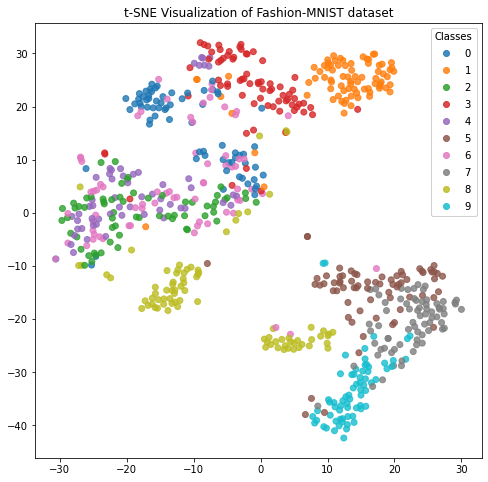

In [28]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE

# Select a subset of data points for t-SNE
data_s = data[0::100]
target_s = target[0::100]
images_s = images[0::100]

# Run t-SNE on data_s
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_s)

# Visualize the data in 2D using a scatter plot
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_s, cmap='tab10', alpha=0.8)
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)
ax.set_title('t-SNE Visualization of Fashion-MNIST dataset')
plt.show()